In [1]:
from commpy.sequences  import pnsequence as bits
from commpy.modulation import QAMModem
from commpy.utilities  import upsample
from commpy.utilities  import signal_power
from commpy.utilities  import bitarray2dec, dec2bitarray
from commpy.filters    import rrcosfilter
from commpy.channels   import awgn
from scipy.signal      import lfilter as firFilter
from scipy.signal      import decimate
from scipy.signal      import dlti
from sympy.combinatorics.graycode import GrayCode
from numpy.matlib import repmat
from numpy.random import randint
from numpy.random import randn
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy import interpolate
import itertools
import pandas as pd
import math
import scipy
from scipy import signal
from scipy.special import erfc
from scipy import special as sp

# import functions
# %run -i '/home/weverton_mm/Documentos/TCC_github/TCC-OFDM-system/functions.py'


In [2]:
def SP(bits):
    return bits.reshape(len(dataCarriers), mu)



def mapping_tab(mu):
    if mu == 2:
        mapping_table = {
            (0,0) : -1 - 1j,     (0,1) : -1 + 1j,      (1,1) : 1 + 1j,     (1,0) : 1 - 1j          
        }
    elif mu == 4:
        mapping_table = {
            (0,0,0,0) : -3-3j,    (0,0,0,1) : -3-1j,    (0,0,1,0) : -3+3j,    (0,0,1,1) : -3+1j,    (0,1,0,0) : -1-3j,
            (0,1,0,1) : -1-1j,    (0,1,1,0) : -1+3j,    (0,1,1,1) : -1+1j,    (1,0,0,0) :  3-3j,    (1,0,0,1) :  3-1j,
            (1,0,1,0) :  3+3j,    (1,0,1,1) :  3+1j,    (1,1,0,0) :  1-3j,    (1,1,0,1) :  1-1j,    (1,1,1,0) :  1+3j,
            (1,1,1,1) :  1+1j
        }
    elif mu == 6:
        mapping_table = {
            (0,0,0,0,0,0) : 7 + 7j,    (0,0,0,0,0,1) : 7 + 5j,    (0,0,0,0,1,0) : 5 + 7j,    (0,0,0,0,1,1) : 5 + 5j,
            (0,0,0,1,0,0) : 7 + 1j,    (0,0,0,1,0,1) : 7 + 3j,    (0,0,0,1,1,0) : 5 + 1j,    (0,0,0,1,1,1) : 5 + 3j,
            (0,0,1,0,0,0) : 1 + 7j,    (0,0,1,0,0,1) : 1 + 5j,    (0,0,1,0,1,0) : 3 + 7j,    (0,0,1,0,1,1) : 3 + 5j,
            (0,0,1,1,0,0) : 1 + 1j,    (0,0,1,1,0,1) : 1 + 3j,    (0,0,1,1,1,0) : 3 + 1j,    (0,0,1,1,1,1) : 3 + 3j,
            (0,1,0,0,0,0) : 7 - 7j,    (0,1,0,0,0,1) : 7 - 5j,    (0,1,0,0,1,0) : 5 - 7j,    (0,1,0,0,1,1) : 5 - 5j,
            (0,1,0,1,0,0) : 7 - 1j,    (0,1,0,1,0,1) : 7 - 3j,    (0,1,0,1,1,0) : 5 - 1j,    (0,1,0,1,1,1) : 5 - 3j,
            (0,1,1,0,0,0) : 1 - 7j,    (0,1,1,0,0,1) : 1 - 5j,    (0,1,1,0,1,0) : 3 - 7j,    (0,1,1,0,1,1) : 3 - 5j,
            (0,1,1,1,0,0) : 1 - 1j,    (0,1,1,1,0,1) : 1 - 3j,    (0,1,1,1,1,0) : 3 - 1j,    (0,1,1,1,1,1) : 3 - 3j,
            (1,0,0,0,0,0) : -7 + 7j,    (1,0,0,0,0,1) : -7 + 5j,    (1,0,0,0,1,0) : -5 + 7j,    (1,0,0,0,1,1) : -5 + 5j,
            (1,0,0,1,0,0) : -7 + 1j,    (1,0,0,1,0,1) : -7 + 3j,    (1,0,0,1,1,0) : -5 + 1j,    (1,0,0,1,1,1) : -5 + 3j,
            (1,0,1,0,0,0) : -1 + 7j,    (1,0,1,0,0,1) : -1 + 5j,    (1,0,1,0,1,0) : -3 + 7j,    (1,0,1,0,1,1) : -3 + 5j,
            (1,0,1,1,0,0) : -1 + 1j,    (1,0,1,1,0,1) : -1 + 3j,    (1,0,1,1,1,0) : -3 + 1j,    (1,0,1,1,1,1) : -3 + 3j,
            (1,1,0,0,0,0) : -7 - 7j,    (1,1,0,0,0,1) : -7 - 5j,    (1,1,0,0,1,0) : -5 - 7j,    (1,1,0,0,1,1) : -5 - 5j,
            (1,1,0,1,0,0) : -7 - 1j,    (1,1,0,1,0,1) : -7 - 3j,    (1,1,0,1,1,0) : -5 - 1j,    (1,1,0,1,1,1) : -5 - 3j,
            (1,1,1,0,0,0) : -1 - 7j,    (1,1,1,0,0,1) : -1 - 5j,    (1,1,1,0,1,0) : -3 - 7j,    (1,1,1,0,1,1) : -3 - 5j,
            (1,1,1,1,0,0) : -1 - 1j,    (1,1,1,1,0,1) : -1 - 3j,    (1,1,1,1,1,0) : -3 - 1j,    (1,1,1,1,1,1) : -3 - 3j,
    
        }
        
    return mapping_table



def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])




def OFDM_symbol(QAM_payload):
    symbol = np.zeros(K, dtype = complex) # todas as K subportadoras
    symbol[pilotCarriers] = pilotValue  # aloca as subportadoras piloto 
    symbol[dataCarriers] = QAM_payload  # aloca as subportadoras de dados
    return symbol



def IDFT(OFDM_data):
    return np.fft.ifft(np.sqrt(len(OFDM_data))*OFDM_data)



def addCP(OFDM_time, CP):
    cp = OFDM_time[-CP:]               # pega as últimas amostras do CP ...
    return np.hstack([cp, OFDM_time])  # ... e as adiciona no início dos dados



def channel(signal, type_channel, snr, M):
#     WIRELESS
    if type_channel == 'wireless':        
        convolved = np.convolve(signal, channelResponse)
        signal_power = np.mean(abs(convolved ** 2))
        sigma2 = signal_power * 10 **(-snr/10)  # potência do ruído

#         print ("RX Potência do sinal: %.8f. Potência do ruído: %.8f" % (signal_power, sigma2))
        
        noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape) + 1j * np.random.randn(*convolved.shape))
        
        return convolved + noise
    

    elif type_channel == 'awgn':
        
        snrdB    = snr + 10*np.log10(np.log2(M))
        avg_energy = sum(abs(signal)**2) / len(signal)        
                
        N0       = avg_energy/(10**(snrdB/10))
        σ        = np.sqrt(N0*SpS)        

        noise    = np.random.normal(0, σ, len(signal)) + 1j*np.random.normal(0, σ, len(signal))
        noise    = (1/np.sqrt(np.pi)) * noise
        return signal + noise
    
    


def removeCP(signal):
    return signal[CP:len(signal)]



def DFT(OFDM_RX):
    return np.fft.fft(np.sqrt(len(OFDM_RX))*OFDM_RX)



def channelEstimate(OFDM_demod):
    pilots = OFDM_demod[pilotCarriers]  #  extrair os valores piloto do sinal RX
    Hest_at_pilots = pilots / pilotValue # divide pelo valor do piloto transmitido; pilotValue = 3 + 3j
    
    # Interpolação entre as portadoras piloto para realizar a estimação do canal nas portadoras de dados
    Hest_abs = interp1d(pilotCarriers, abs(Hest_at_pilots), kind = 'linear')(allCarriers)
    Hest_phase = interp1d(pilotCarriers, np.angle(Hest_at_pilots), kind = 'linear')(allCarriers)
    Hest = Hest_abs * np.exp(1j * Hest_phase)
    
#     plt.plot(allCarriers, abs(H_exact), label = 'Canal correto')
#     plt.stem(pilotCarriers, abs(Hest_at_pilots), label = 'Estimativas piloto')
#     plt.plot(allCarriers, abs(Hest), label = 'Canal estimado via interpolação')
#     plt.grid(True); plt.xlabel('índice da portadora'); plt.ylabel('$|H(f)|$'); plt.legend(fontsize=10)
#     plt.ylim(0,2)
    
    return Hest



def equalize(OFDM_demod, Hest):
    return OFDM_demod / Hest



def get_payload(equalized): # apenas os símbolos OFDM de portadoras de dados
    return equalized[dataCarriers]



def Demapping(QAM_est):
    # pontos da constelação
    constellation = np.array([x for x in demapping_table.keys()])
    
    # calcula a distância entre cada ponto recebido
    dists = abs(QAM_est.reshape((-1,1)) - constellation.reshape((1,-1)))
    
    # para cada elemento no QAM, escolher o índice na constelação
    # que pertence ao ponto de constelação mais próximo        
    const_index = dists.argmin(axis=1) # argmin(axis = 1) porque vai pegar o índice do menor valor em cada linha

    # obter de volta o ponto real da constelação    
    hardDecision = constellation[const_index]

    # converte o símbolo da constelação em sequência de bits
    return np.vstack([demapping_table[C] for C in hardDecision]), hardDecision



def PS(bits):
    return bits.reshape((-1,))




def Qfunc(x):
    return 0.5-0.5*sp.erf(x/np.sqrt(2))

def theoryBER_MQAM(M, EbN0):
    
    EbN0lin = 10**(EbN0/10)    
    L  = np.sqrt(M)
    Pb = 2*(1-1/L)/np.log2(L)*Qfunc(np.sqrt(3*np.log2(L)/(L**2-1)*(2*EbN0lin)))
    
    return Pb    

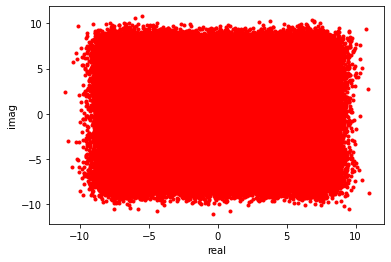

In [5]:
n = 14
mu = 6
M = 2**mu
SpS = 1
payloadBits_per_OFDM = mu * 2**n
K = payloadBits_per_OFDM // 2**(n-5)
bits_per_ofdm = payloadBits_per_OFDM // K
CP = K // 4
P = 8 # number of pilot carriers per OFDM block
pilotValue = 7+7j # The known value each pilot transmits

allCarriers = np.arange(K)  # indices of all subcarriers ([0, 1, ... K-1])
pilotCarriers = allCarriers[::K//P] # Pilots is every (K/P)th carrier.
        # For convenience of channel estimation, let's make the last carriers also be a pilot
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P+1        
dataCarriers = np.delete(allCarriers, pilotCarriers) # data carriers are all remaining carriers


mapping_table = mapping_tab(mu)
demapping_table = {v : k for k, v in mapping_table.items()}


channelResponse = np.array([1, 0, 0.3+0.3j])  # the impulse response of the wireless channel
H_exact = np.fft.fft(channelResponse, K)


EbN0dB_ = np.arange(1,20.5,0.5)+5
BER     = np.zeros(EbN0dB_.shape)

for subcarrier in range(K):
    for indSNR in range(EbN0dB_.size):

        EbN0dB = EbN0dB_[indSNR]

        bits = np.random.binomial(n = 1, p = 0.5, size = (len(dataCarriers) * mu, ))
        bits_SP = SP(bits)

        QAM = Mapping(bits_SP)
        OFDM_data = OFDM_symbol(QAM)
#         print("OFDM_data DOWN", len(OFDM_data))
        
#         symbolsUp = upsample(OFDM_data, SpS) # Aumenta a taxa de amostragem do sinal para SpS amostras/símbolo
#         print("OFDM_data UP", len(symbolsUp))
        
        OFDM_time = IDFT(OFDM_data)

        OFDM_withCP = addCP(OFDM_time, CP)

        OFDM_TX = OFDM_withCP

        OFDM_RX = channel(OFDM_TX, 'awgn', EbN0dB, M = 64)
        OFDM_RX_noCP = removeCP(OFDM_RX)
        OFDM_demod = DFT(OFDM_RX_noCP)
        
#         plt.figure(2)
#         plt.plot(OFDM_demod.real, OFDM_demod.imag,'.',color = 'red');
#         plt.xlabel('real');
#         plt.ylabel('imag');
        
        
        Hest = channelEstimate(OFDM_demod)
        equalized_Hest = equalize(OFDM_demod, Hest)
        QAM_est = get_payload(equalized_Hest)
        
        plt.figure(3)
        plt.plot(QAM_est.real, QAM_est.imag,'.',color = 'red');
        plt.xlabel('real');
        plt.ylabel('imag');

        PS_est, hardDecision = Demapping(QAM_est)

        bits_est = PS(PS_est)

        BER[indSNR] = BER[indSNR] + (np.sum(abs(bits-bits_est))/len(bits))/K


<ipython-input-6-78c41eacfc7e>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(EbN0dB_,np.log10(BER),'o');
<ipython-input-6-78c41eacfc7e>:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(EbN0dB_, np.log10(BERtheory))


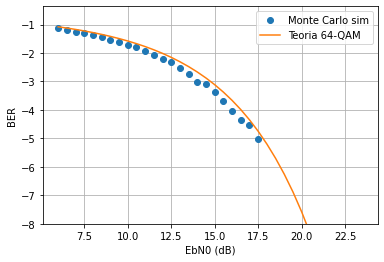

In [6]:
BERtheory = theoryBER_MQAM(M, EbN0dB_)

plt.plot(EbN0dB_,np.log10(BER),'o');
plt.plot(EbN0dB_, np.log10(BERtheory))
plt.legend(['Monte Carlo sim', "Teoria "+ str(M) + "-QAM"])
plt.xlabel('EbN0 (dB)');
plt.ylabel('BER');
plt.ylim(-8)
plt.grid()